# Logistics Regression
- Dataset reference: https://archive.ics.uci.edu/ml/datasets/Ionosphere

# What is Logistic Regression
- Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.
- It is named 'Logistic Regression' because its underlying technique is quite the same as Linear Regression. 

# Where to use Logistic Regression
- Logistic Regression is used when the dependent variable(target) is categorical. For example, To predict whether an email is spam (1) or (0) Whether the tumor is malignant (1) or not (0)

# Mathematical formula of `Logistic Regression` or `Logit Function` or `Sigmoid Function` 

$$S = \frac{1}{(1-\exp^{-x})}$$
or 
$$S = \frac{1}{(1-\exp^{-(mx+c)})}$$
- Where x is feature(s)

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [3]:
df = pd.read_csv("ionosphere.data.csv",header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.0,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.0,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b


In [5]:
df[34].replace({"g":1,"b":0},inplace=True)

In [6]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1


In [10]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

In [11]:
X.shape

(351, 34)

In [12]:
y.shape

(351,)

# Linear Regression Model

In [15]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

In [18]:
r2_score(y,y_pred)*61

37.818941536576375

In [22]:
y_pred_sort = sorted(y_pred)

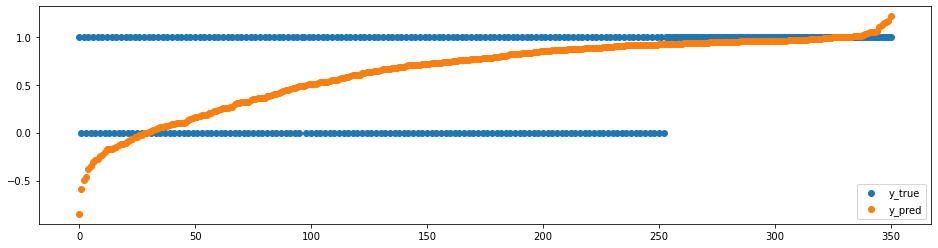

In [25]:
plt.figure(figsize=(16,4))
plt.scatter(range(len(y)),y,label="y_true")
plt.scatter(range(len(y)),y_pred_sort,label="y_pred")
plt.legend()
plt.show()

In [27]:
lor = LogisticRegression()
lor.fit(X,y)
y_pred = lor.predict(X)

# Accuracy_Score

In [29]:
accuracy_score(y,y_pred)*100

91.16809116809117

# Confusion_Matrix

In [39]:
confusion_matrix(y,y_pred)

array([[101,  25],
       [  6, 219]])

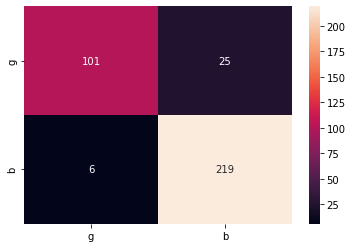

In [44]:
sns.heatmap(confusion_matrix(y,y_pred),annot=True,yticklabels=["g","b"],xticklabels=["g","b"],fmt="d")
plt.show()

In [30]:
y_prob = lor.predict_proba(X)

In [35]:
y_prob_sort_0 = sorted(y_prob[:,0])
y_prob_sort_1 = sorted(y_prob[:,1])

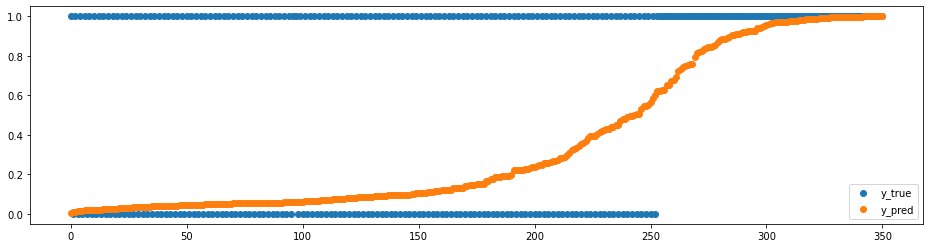

In [38]:
plt.figure(figsize=(16,4))
plt.scatter(range(len(y)),y,label="y_true")
plt.scatter(range(len(y)),y_prob_sort_0,label="y_pred")
# plt.scatter(range(len(y)),y_prob_sort_1,label="y_pred")
plt.legend()
plt.show()